In [10]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.13.1


In [0]:
from google.colab import files
uploaded = files.upload()

Saving airbnb_copenhagen_year to airbnb_copenhagen_year


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['airbnb_copenhagen_year']))

In [0]:
df = df.drop(['id'], axis=1)

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.host_identity_verified = labelencoder.fit_transform(df.host_identity_verified)

In [15]:
df.columns

Index(['host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable', 'Jan',
       'Feb', 'Mar', 'Apr', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'host_age', 'a_few_days', 'no_response', 'within_a_day',
       'within_a_few_hours', 'within_an_hour', 'flexible', 'moderate',
       'strict_14_with_grace_period', 'super_strict_30', 'distance_to_center'],
      dtype='object')

In [16]:
X = df.drop(['price'], axis=1)
y = df.price
print(X.shape)
print(y.shape)

(245288, 32)
(245288,)


In [0]:
X = X.drop(['no_response','instant_bookable','within_a_day','within_an_hour',
            'host_identity_verified','flexible','strict_14_with_grace_period', 'moderate',
           'within_a_few_hours','a_few_days','super_strict_30'], axis=1)

In [17]:
from sklearn.model_selection import train_test_split
# Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
print("Testing dataset length: ",len(X_test))
print("Training dataset length: ",len(X_train))

Testing dataset length:  49058
Training dataset length:  196230


In [18]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

def create_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    # Compile model
    #optimizer = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

Using TensorFlow backend.


In [20]:
model = create_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,145
Trainable params: 2,145
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=256)

Instructions for updating:
Use tf.cast instead.
Train on 196230 samples, validate on 49058 samples
Epoch 1/200
196230/196230 [==============================] - 2s 9us/step - loss: 251835.9327 - mean_absolute_error: 387.6367 - val_loss: 65610.1108 - val_mean_absolute_error: 193.0030
Epoch 2/200
196230/196230 [==============================] - 1s 6us/step - loss: 63250.3413 - mean_absolute_error: 189.8851 - val_loss: 61502.7256 - val_mean_absolute_error: 186.9712
Epoch 3/200
196230/196230 [==============================] - 1s 6us/step - loss: 60853.8104 - mean_absolute_error: 186.2955 - val_loss: 60269.1505 - val_mean_absolute_error: 184.8808
Epoch 4/200
196230/196230 [==============================] - 1s 6us/step - loss: 59942.5968 - mean_absolute_error: 184.8751 - val_loss: 59763.1576 - val_mean_absolute_error: 183.7133
Epoch 5/200
196230/196230 [==============================] - 1s 6us/step - loss: 59488.7000 - mean_absolute_error: 184.1759 - val_loss: 59525.4526 - val_mean_absolute_e

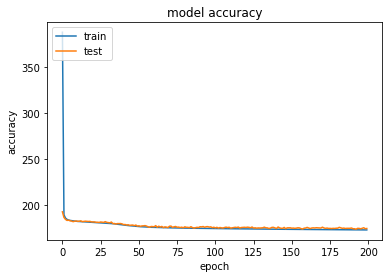

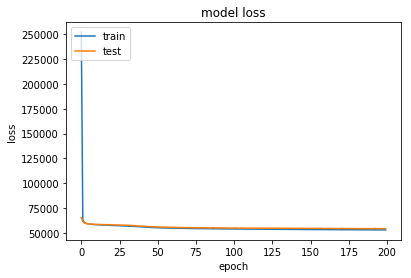

In [22]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head(10)

,val_loss,val_mean_absolute_error,loss,mean_absolute_error,epoch
0,65610.110824,193.003011,251835.932675,387.636744,0
1,61502.725642,186.971193,63250.341285,189.885147,1
2,60269.150487,184.880818,60853.810409,186.295506,2
3,59763.157644,183.713331,59942.596777,184.875149,3
4,59525.452645,183.984128,59488.700015,184.175911,4
5,59234.240801,183.297240,59210.770971,183.745867,5
6,59125.407203,183.031718,59008.016038,183.469269,6
7,59088.110783,182.370125,58842.248549,183.199048,7
8,58886.647772,182.836210,58711.405958,182.992253,8
9,58839.403513,183.120209,58578.327458,182.784420,9


In [26]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,val_loss,val_mean_absolute_error,loss,mean_absolute_error,epoch
190,54564.405648,174.717988,53334.926551,173.557507,190
191,54558.584238,174.710622,53311.663052,173.498541,191
192,54700.173923,174.196129,53295.390145,173.513188,192
193,54547.016315,175.133028,53299.448733,173.475120,193
194,54490.325848,175.051595,53290.849725,173.484056,194
195,54537.585534,174.684682,53291.323854,173.486107,195
196,54512.565938,175.156853,53282.968419,173.503852,196
197,54534.028863,175.802046,53275.057611,173.434874,197
198,54488.218392,174.706568,53274.887904,173.443630,198
199,54534.922745,174.968203,53251.884675,173.429341,199


In [23]:
example_batch = X_train[:20]
example_result = model.predict(example_batch)
example_result

array([[ 518.77527],
       [ 615.6642 ],
       [ 788.65576],
       [ 499.9925 ],
       [ 668.2782 ],
       [ 482.4029 ],
       [ 508.96014],
       [1176.8909 ],
       [1172.9275 ],
       [1195.0991 ],
       [ 621.36053],
       [ 662.4558 ],
       [ 684.4289 ],
       [ 921.51227],
       [ 587.99   ],
       [1022.52435],
       [ 830.67236],
       [ 887.057  ],
       [ 370.14032],
       [ 550.8874 ]], dtype=float32)

In [24]:
y_train[:20]

185754     601.0
49534      507.0
7701      1249.0
169616     648.0
100740     399.0
11915      751.0
16001      751.0
104016     700.0
46298      802.0
99427     1401.0
122210    1100.0
77578      601.0
223350     498.0
116531     949.0
105979     655.0
209170    1202.0
114121     949.0
56825     1298.0
215180     362.0
214317     503.0
Name: price, dtype: float64

In [0]:
def create_model1():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1))
    # Compile model
    #optimizer = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

In [37]:
model1 = create_model1()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=256)

Train on 196230 samples, validate on 49058 samples
Epoch 1/100
196230/196230 [==============================] - 1s 7us/step - loss: 565645.7571 - mean_absolute_error: 684.8410 - val_loss: 458831.1060 - val_mean_absolute_error: 615.5007
Epoch 2/100
196230/196230 [==============================] - 1s 6us/step - loss: 334306.4491 - mean_absolute_error: 507.6923 - val_loss: 232143.4941 - val_mean_absolute_error: 406.5752
Epoch 3/100
196230/196230 [==============================] - 1s 6us/step - loss: 170346.2953 - mean_absolute_error: 332.2121 - val_loss: 121007.3876 - val_mean_absolute_error: 268.4406
Epoch 4/100
196230/196230 [==============================] - 1s 6us/step - loss: 96444.4485 - mean_absolute_error: 233.6283 - val_loss: 80349.7775 - val_mean_absolute_error: 212.1542
Epoch 5/100
196230/196230 [==============================] - 1s 6us/step - loss: 75040.7369 - mean_absolute_error: 205.5126 - val_loss: 70681.8710 - val_mean_absolute_error: 199.9621
Epoch 6/100
196230/196230 [=

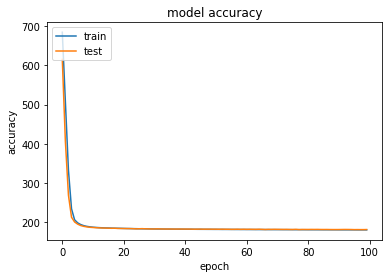

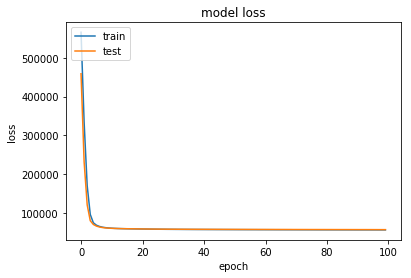

In [39]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head(10)

,val_loss,val_mean_absolute_error,loss,mean_absolute_error,epoch
0,458831.106030,615.500694,565645.757130,684.840999,0
1,232143.494087,406.575152,334306.449143,507.692285,1
2,121007.387625,268.440624,170346.295347,332.212120,2
3,80349.777471,212.154166,96444.448456,233.628319,3
4,70681.870988,199.962118,75040.736895,205.512616,4
5,66541.129932,194.423803,68781.604746,197.719615,5
6,64152.356487,190.781573,65553.569557,193.311133,6
7,62724.617864,188.733230,63634.227697,190.489084,7
8,61820.351659,187.358188,62415.468647,188.690718,8
9,61192.607488,186.359179,61593.360846,187.496533,9


In [41]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,val_loss,val_mean_absolute_error,loss,mean_absolute_error,epoch
90,57453.676059,180.625193,56768.087242,179.902932,90
91,57434.841156,180.741508,56757.666831,179.869183,91
92,57443.184813,180.831605,56740.634558,179.860049,92
93,57432.028290,180.773191,56729.657055,179.860397,93
94,57436.438277,180.667044,56716.231664,179.815915,94
95,57395.295422,180.412528,56701.959320,179.803822,95
96,57380.618339,180.516673,56690.027170,179.743981,96
97,57363.881501,180.432919,56680.880226,179.738298,97
98,57360.158779,180.439668,56666.898019,179.734920,98
99,57347.062834,180.622867,56652.794799,179.669360,99


In [0]:
def create_model2():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    # Compile model
    #optimizer = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

In [46]:
model2 = create_model2()
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 6,337
Trainable params: 6,337
Non-trainable params: 0
_________________________________________________________________


In [47]:
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=256)

Train on 196230 samples, validate on 49058 samples
Epoch 1/100
196230/196230 [==============================] - 3s 17us/step - loss: 183348.7385 - mean_absolute_error: 313.6709 - val_loss: 61732.0514 - val_mean_absolute_error: 187.2612
Epoch 2/100
196230/196230 [==============================] - 3s 13us/step - loss: 60592.8332 - mean_absolute_error: 185.6768 - val_loss: 59719.1935 - val_mean_absolute_error: 183.8773
Epoch 3/100
196230/196230 [==============================] - 3s 13us/step - loss: 59286.6372 - mean_absolute_error: 183.8473 - val_loss: 59131.9527 - val_mean_absolute_error: 182.2718
Epoch 4/100
196230/196230 [==============================] - 3s 13us/step - loss: 58804.3552 - mean_absolute_error: 183.1163 - val_loss: 58841.1257 - val_mean_absolute_error: 182.1251
Epoch 5/100
196230/196230 [==============================] - 3s 13us/step - loss: 58533.2027 - mean_absolute_error: 182.7137 - val_loss: 58699.6275 - val_mean_absolute_error: 182.4278
Epoch 6/100
196230/196230 [=

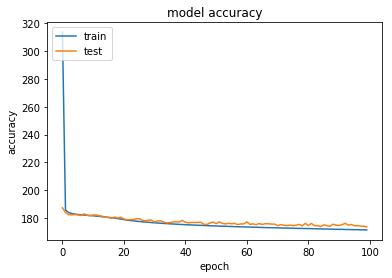

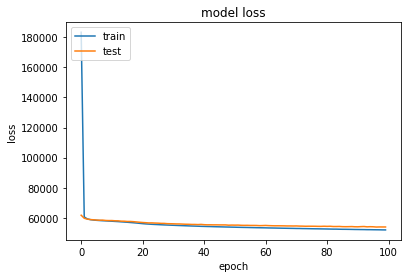

In [48]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()